<a href="https://colab.research.google.com/github/adib2one/Metahueristik-Algorithm/blob/main/Ant%20Colony%20Optimization%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rute terpendek adalah: [0, 6, 2, 13, 4, 9, 5, 14, 12, 8, 3, 1, 10, 7, 11, 0]
Panjang rute terpendek adalah: 35.47353283857487


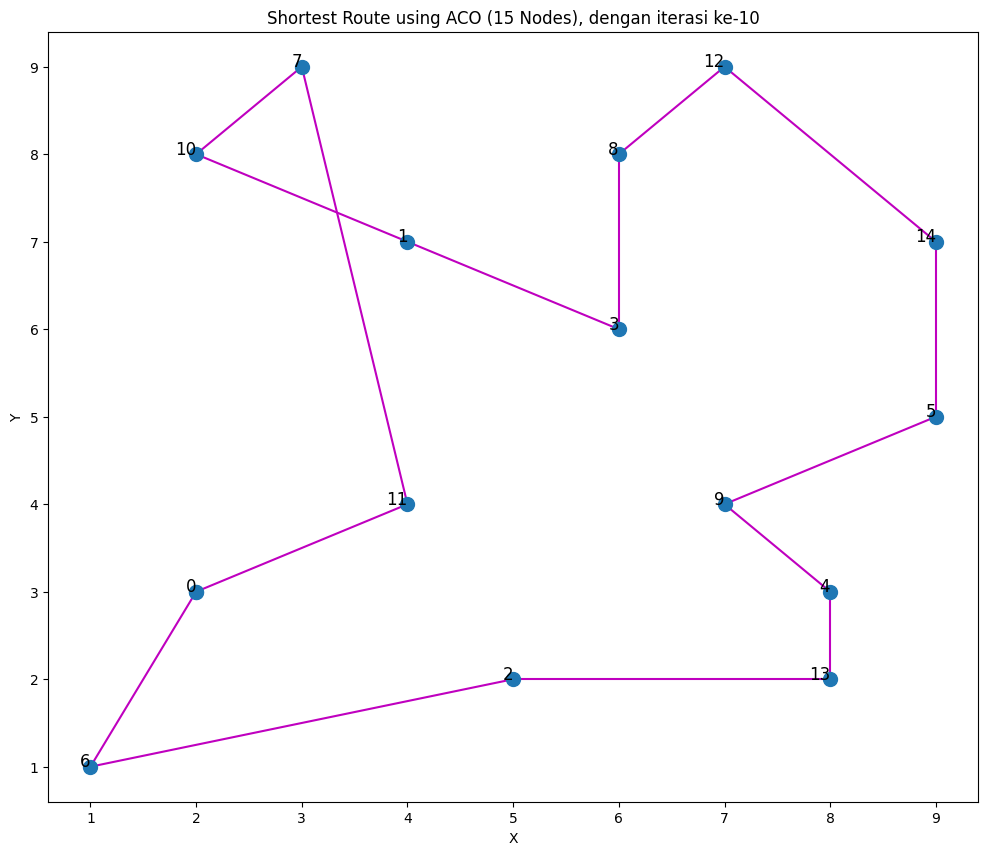

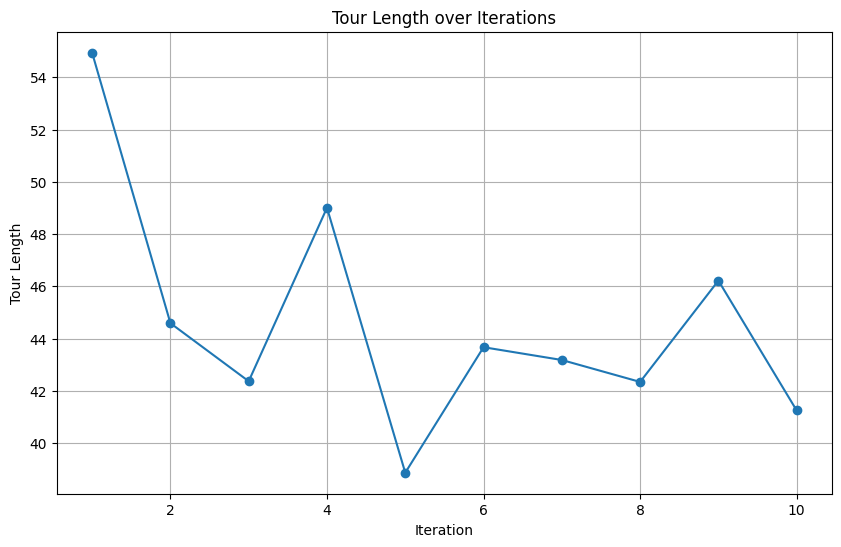

[[4.340277777777778e-06, 0.05780324061584413, 0.00390891035147551, 0.10957139447988537, 0.023727767636975296, 0.039888133656096295, 0.39577026892905526, 0.04940035255565232, 0.01636451846355705, 0.03644742383350555, 0.022635478571886625, 0.1608530662069577, 0.01530278672441152, 0.034404918290457734, 0.010863802159722494], [0.05780324061584413, 4.340277777777778e-06, 0.005507839599870414, 0.30906037483254317, 0.00036835328934462544, 4.340277777777778e-06, 0.040808011590324975, 0.2691944743606122, 0.048027134577898825, 4.340277777777778e-06, 0.24339956250345599, 3.765065217588493e-05, 0.0005409242446691377, 4.340277777777778e-06, 0.0021814753754102753], [0.00390891035147551, 0.005507839599870414, 4.340277777777778e-06, 0.018506310040578643, 0.0075190555129037405, 0.00044440990359350947, 0.2830885805754184, 4.340277777777778e-06, 4.340277777777778e-06, 0.03515459182255038, 0.0006760615324800927, 0.4131731309452879, 4.340277777777778e-06, 0.2089458110802132, 4.340277777777778e-06], [0.1095

In [ ]:
import random
import matplotlib.pyplot as plt
import math

class AntColony:
      # Melakukan insiasi terhadap parameter yang dibutuhkan dengan menggunakan konstruktor
    def __init__(self, nodes, edges, num_ants, alpha=1, beta=1, rho=0.5, iterations= None):
        self.nodes = nodes
        self.edges = edges
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.iterations = iterations
        self.pheromones = [[1 / (nodes * nodes) for j in range(nodes)] for i in range(nodes)]
        self.leng_list = []

    #  Rumus umum pada Ant Colony Optimization
    def select_next_node(self, current_node, unvisited_nodes):
        unvisited_nodes = list(unvisited_nodes)
        pheromones = [self.pheromones[current_node][node] for node in unvisited_nodes]
        eta = [1 / self.edges.get((current_node, node), float('inf')) for node in unvisited_nodes]
        probabilities = [pheromone ** self.alpha * eta_val ** self.beta for pheromone, eta_val in zip(pheromones, eta)]
        total_probability = sum(probabilities)
        probabilities = [prob / total_probability for prob in probabilities]
        selected_node = random.choices(unvisited_nodes, weights=probabilities)[0]
        return selected_node

    # Evaporasi atau penguapan pada feromon dan melakukan update pada feromon
    def update_pheromones(self, tours):
        for i in range(self.nodes):
            for j in range(self.nodes):
                self.pheromones[i][j] *= (1 - self.rho)

        # Digunakan untuk mengasilkan tour dengan rumus P(i,j) = 1 / d(i,j)
        for tour in tours:
            tour_length = sum(self.edges.get((tour[i], tour[i + 1]), float('inf')) for i in range(len(tour) - 1))
            for i in range(len(tour) - 1):
                self.pheromones[tour[i]][tour[i + 1]] += 1 / tour_length
                self.pheromones[tour[i + 1]][tour[i]] += 1 / tour_length

    # fungsi dibawah untuk menginisiasi dan mencari rute terpendek
    def solve(self, start_node):
        shortest_tour = None
        shortest_length = float('inf')

        for _ in range(self.iterations):
            tours = []
            for _ in range(self.num_ants):
                tour = [start_node]
                unvisited_nodes = set(range(self.nodes))
                unvisited_nodes.remove(start_node)
                while unvisited_nodes:
                    current_node = tour[-1]
                    next_node = self.select_next_node(current_node, unvisited_nodes)
                    tour.append(next_node)
                    unvisited_nodes.remove(next_node)
                tour.append(tour[0])
                tours.append(tour)

            self.update_pheromones(tours)

            for tour in tours:
                tour_length = sum(self.edges.get((tour[i], tour[i + 1]), float('inf')) for i in range(len(tour) - 1))
                if tour_length < shortest_length:
                    shortest_length = tour_length
                    shortest_tour = tour
            self.leng_list.append(tour_length)


        return shortest_tour

    # fungsi untuk melakukan visualisasi terhadap perubahan variabel
    def visualize(self, shortest_tour, node_coords):
        x = [node_coords[node][0] for node in shortest_tour]
        y = [node_coords[node][1] for node in shortest_tour]

        plt.figure(figsize=(12, 10))
        plt.scatter(x, y, s=100, zorder=2)

        for i in range(len(shortest_tour) - 1):
            start_node = shortest_tour[i]
            end_node = shortest_tour[i + 1]
            start_x, start_y = node_coords[start_node]
            end_x, end_y = node_coords[end_node]
            plt.plot([start_x, end_x], [start_y, end_y], 'm-', zorder=1)

        for node in node_coords:
            plt.text(node_coords[node][0], node_coords[node][1], str(node), fontsize=12, ha='right')

        plt.title(f"Shortest Route using ACO (15 Nodes), dengan iterasi ke-{self.iterations}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()


    def plot_tour_length(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.iterations + 1), self.leng_list, marker='o', linestyle='-')
        plt.title("Tour Length over Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Tour Length")
        plt.grid(True)
        plt.show()
        print(self.pheromones)

    # fungsi untuk mengetahui node mana yang dilewati dan mengetahui panjang rute yang terpendek
    def print_shortest_tour(self, shortest_tour, shortest_length):
        print("Rute terpendek adalah:", shortest_tour)
        print("Panjang rute terpendek adalah:", shortest_length)


# jumlah node
nodes = 15

node_coords = {
    0: (2, 3), 1: (4, 7), 2: (5, 2), 3: (6, 6), 4: (8, 3), 5: (9, 5), 6: (1, 1), 7: (3, 9), 8: (6, 8), 9: (7, 4), 10: (2, 8), 11: (4, 4), 12: (7, 9), 13: (8, 2), 14: (9, 7)
}
# Dictionary untuk menyimpan jarak antar koordinat
edges = {}

# Fungsi untuk menghitung jarak antara dua titik
def hitung_jarak(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Iterasi melalui pasangan koordinat dan hitung jaraknya
for a in node_coords:
    for b in node_coords:
        if a != b:  # Pastikan koordinat a dan b tidak sama
            edges[(a, b)] = hitung_jarak(node_coords[a], node_coords[b])

# Print dictionary jarak antar koordinat

# Making the graph undirected

for (i, j), dist in list(edges.items()):
    edges[(j, i)] = dist




# melakukan inisiasi output dari kode OOP diatas
aco = AntColony(nodes, edges, num_ants=10, alpha=1, beta=2,iterations=10)
shortest_tour = aco.solve(start_node=0)
shortest_length = sum(edges.get((shortest_tour[i], shortest_tour[i + 1]), float('inf')) for i in range(len(shortest_tour) - 1))
aco.print_shortest_tour(shortest_tour, shortest_length)
aco.visualize(shortest_tour, node_coords)
print("\n")
aco.plot_tour_length()